### 1. Set-up

In [9]:
# importing packages
import numpy as np
import imageio.v3 as iio
# import ipympl
import matplotlib.pyplot as plt
import skimage as ski
import os

In [15]:
# importing images as an image collection
dir = "/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data"
file_spec = '*.JPG'
load_pattern = os.path.join( dir , file_spec )

data = ski.io.imread_collection(load_pattern)
print(data)

['/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/DSC01088.JPG', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/DSC01089.JPG', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/DSC01090.JPG', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/DSC01091.JPG', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/DSC01092.JPG', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/DSC01093.JPG', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/DSC01094.JPG', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/DSC01095.JPG', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/DSC01096.JPG']


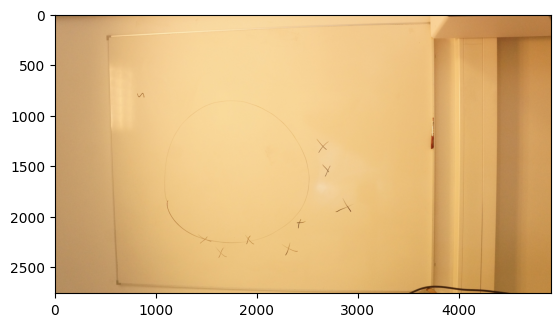

In [19]:
# testing: displaying a single image in the data structure
%matplotlib inline
fig, ax = plt.subplots()
ax.imshow(data[0])

### 2. Pre-processing

The following preprocessing operations should be implemented:

- Rotating the image (90 degrees clockwise)

- Cropping the image to the area of the whiteboard
    - Find the area of to crop (e.g., by drawing on the image)

- Consider to work with a homographic transformation to account for the distortions due to the angling of the camera

#### 2.1 Rotating images

[[[0.70588235 0.58039216 0.42745098]
  [0.70588235 0.58039216 0.42745098]
  [0.70980392 0.58431373 0.43137255]
  ...
  [0.50588235 0.41176471 0.23137255]
  [0.50588235 0.41176471 0.23137255]
  [0.50196078 0.40784314 0.22745098]]

 [[0.69411765 0.56862745 0.41568627]
  [0.69803922 0.57254902 0.41960784]
  [0.70196078 0.57647059 0.42352941]
  ...
  [0.52156863 0.42745098 0.24705882]
  [0.51764706 0.42352941 0.24313725]
  [0.50980392 0.41568627 0.23529412]]

 [[0.70588235 0.58039216 0.42745098]
  [0.70588235 0.58039216 0.42745098]
  [0.70196078 0.57647059 0.42352941]
  ...
  [0.55686275 0.4627451  0.28235294]
  [0.55294118 0.45882353 0.27843137]
  [0.54117647 0.44705882 0.26666667]]

 ...

 [[0.74901961 0.56862745 0.3372549 ]
  [0.75294118 0.57254902 0.34117647]
  [0.75294118 0.57254902 0.34117647]
  ...
  [0.43921569 0.30980392 0.14117647]
  [0.43529412 0.30588235 0.1372549 ]
  [0.44313725 0.31372549 0.14509804]]

 [[0.74901961 0.56862745 0.3372549 ]
  [0.74901961 0.56862745 0.3372549 ]


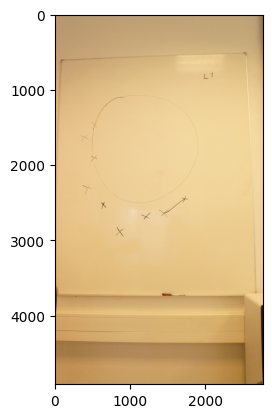

In [109]:
# Rotating as single image
im = data[1]
test_im = ski.transform.rotate( im , angle = 360-90 , resize=True)

print(test_im)
fig, ax = plt.subplots()
ax.imshow(test_im)

In [192]:
# setting up a loop to rotate image
data_rotated = []

for i in range( 0 , len(data) ):
    data_rotated.append( ski.transform.rotate( data[i] , angle = 360-90 , resize=True) )

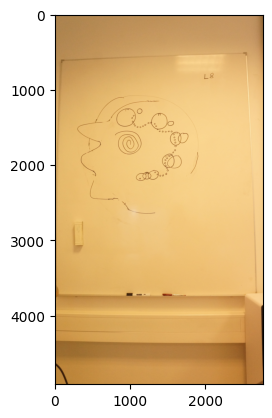

In [193]:
# testing the result
fig, ax = plt.subplots()
ax.imshow(data_rotated[8])

#### 2.2 Cropping images

In [15]:
# defining show_image function
def show_image(image, cmap):
    fig, ax = plt.subplots()
    ax.imshow(image, cmap = cmap)

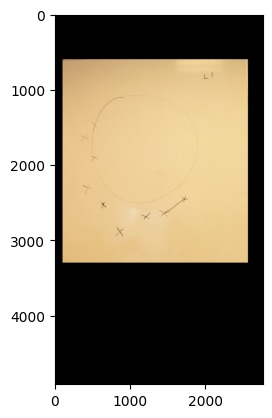

In [195]:
# deciding where to crop by drawing using the test image
fig, ax = plt.subplots()
ax.imshow(test_im)

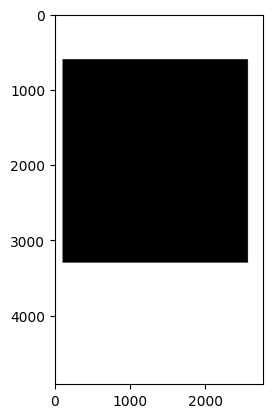

In [197]:
# creating a mask in the size of the images
mask = np.ones(shape=test_im.shape[0:2], dtype="bool") # creates a mask in the size of the image where each picture can be turned on or off

# defining the area of interest
rows, columns = ski.draw.rectangle(start=(600,100) , end = (3300,test_im.shape[1]-200))

# turning on the pixels in only this area 
mask[rows, columns] = False

# displaying the masked area
fig, ax = plt.subplots()
ax.imshow(mask, cmap="gray")

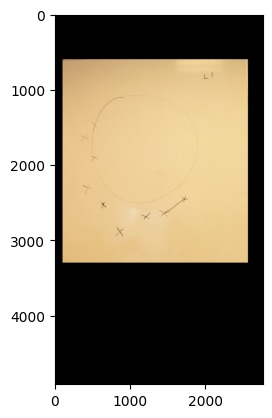

In [198]:
# testing out the masking
test_im[mask] = 0

fig, ax = plt.subplots()
ax.imshow(test_im, cmap="gray")

In [199]:
# setting up a loop to mask all images
data_masked = []

for i in range( 0 , len(data_rotated) ):
    im = data_rotated[i]
    im[mask] = 0 ,
    data_masked.append(im)

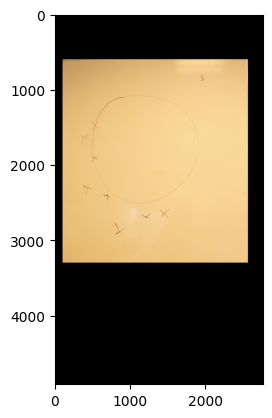

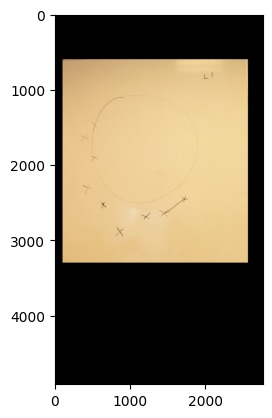

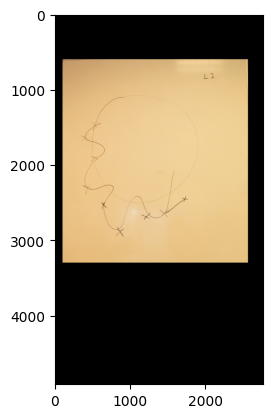

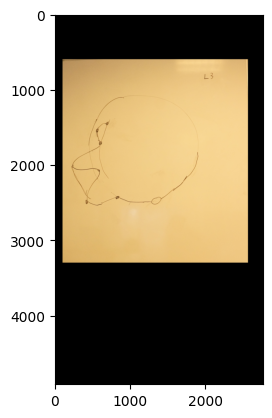

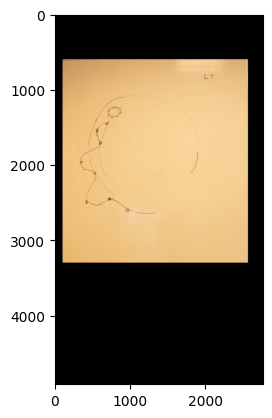

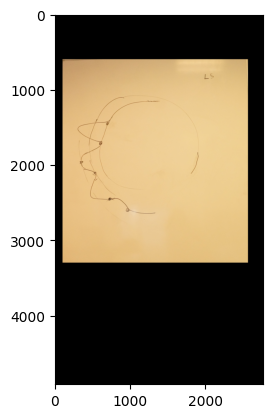

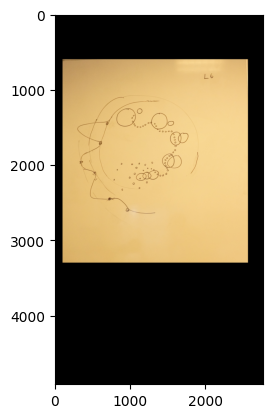

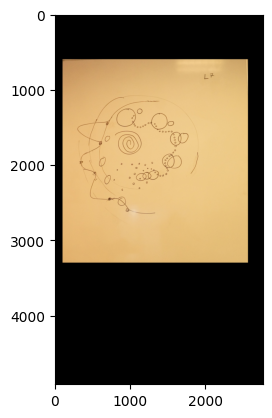

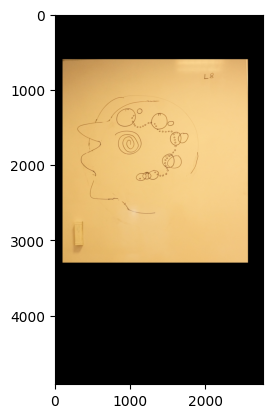

In [200]:
for i in data_masked:
    show_image(i, cmap=None)

(array([[ 600,  601,  602, ..., 3298, 3299, 3300],
        [ 600,  601,  602, ..., 3298, 3299, 3300],
        [ 600,  601,  602, ..., 3298, 3299, 3300],
        ...,
        [ 600,  601,  602, ..., 3298, 3299, 3300],
        [ 600,  601,  602, ..., 3298, 3299, 3300],
        [ 600,  601,  602, ..., 3298, 3299, 3300]]),
 array([[ 100,  100,  100, ...,  100,  100,  100],
        [ 101,  101,  101, ...,  101,  101,  101],
        [ 102,  102,  102, ...,  102,  102,  102],
        ...,
        [2558, 2558, 2558, ..., 2558, 2558, 2558],
        [2559, 2559, 2559, ..., 2559, 2559, 2559],
        [2560, 2560, 2560, ..., 2560, 2560, 2560]]))

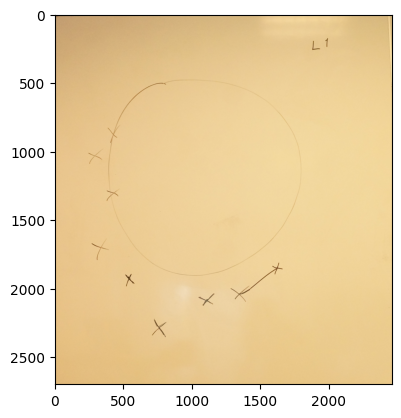

In [206]:
# cropping the image and saving to new files

# defining cropping points (using the mask coordinates)
y1 = 600
y2 = 3300
x1 = 100
x2 = test_im.shape[1]-200

cropped_im = test_im[ y1:y2 , x1:x2 , : ]
show_image(cropped_im, cmap=None)

In [276]:
# setting up directory
dir = '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data'
file_spec = '.tif'

# setting up a loop to crop all images
data_cropped = []

for i in range( 0 , len(data_masked) ):
    im = data_masked[i]
    im = im[ y1:y2 , x1:x2 , : ]
    data_cropped.append(im)
    iio.imwrite( uri = os.path.join( dir , "cropped_image_" + str(i + 1) + file_spec )  , image = im )

In [25]:
# now we can reload the data and move on to the analysis
dir = "/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data"
file_spec = 'cropped_image_*.tif'
load_pattern = os.path.join( dir , file_spec )

data = ski.io.imread_collection(load_pattern)
print(data)

['/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/cropped_image_1.tif', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/cropped_image_2.tif', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/cropped_image_3.tif', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/cropped_image_4.tif', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/cropped_image_5.tif', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/cropped_image_6.tif', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/cropped_image_7.tif', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/cropped_image_8.tif', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/cropped_image_9.tif']


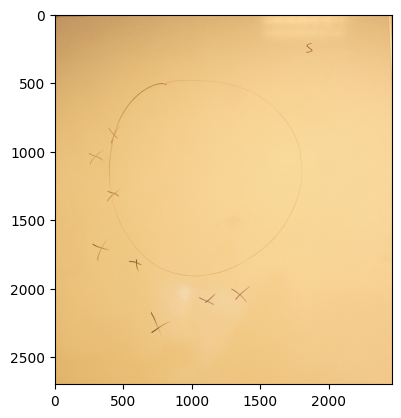

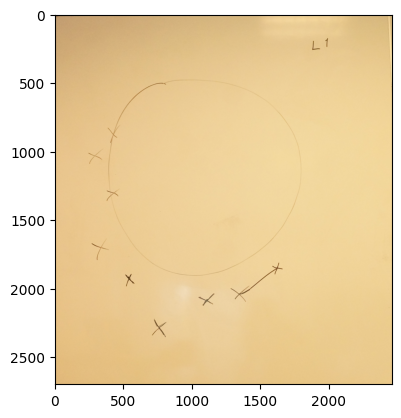

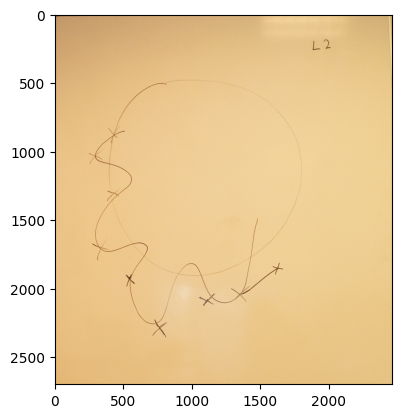

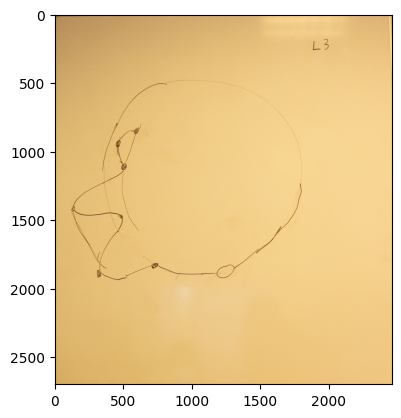

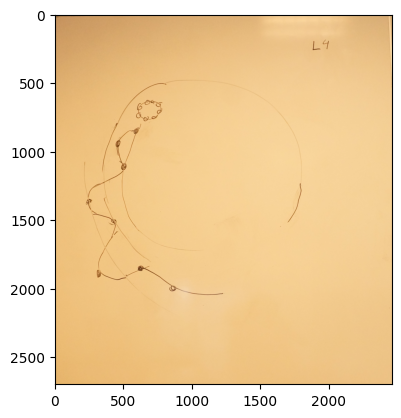

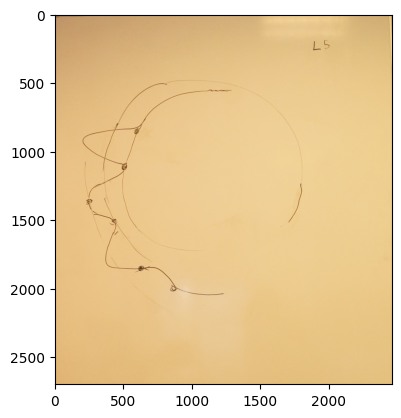

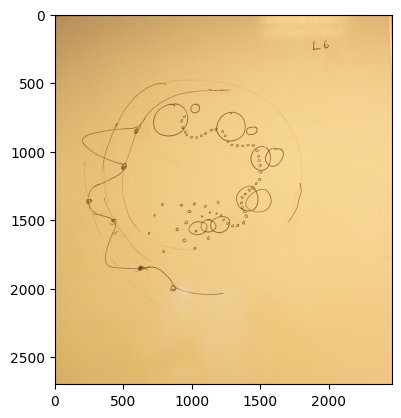

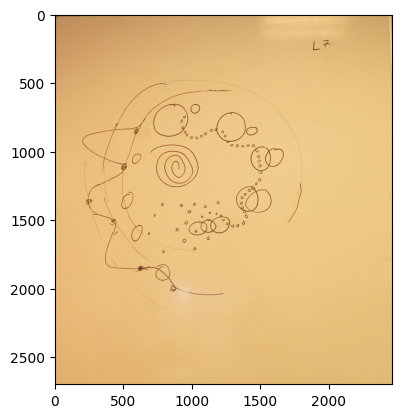

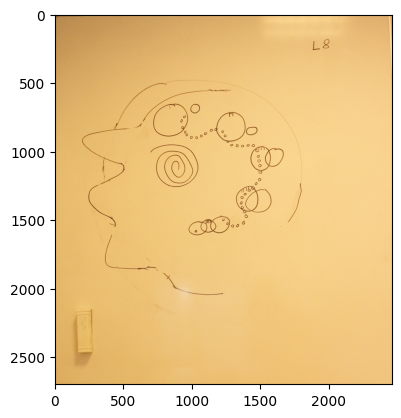

In [17]:
for i in data:
    show_image(i, cmap=None)

## 3. Additional processing

Goal: Make a circular mask around the actual drawing

Alternative: Make boxes to cover the sponge in image l8 and all the written names

In [20]:
# saving a single image to identify center
test_image = data[0]
test_image = ski.util.img_as_ubyte(test_image) # necessary conversion to save the data structure as a jpg

iio.imwrite( uri = dir + '/test_image.jpg' , image = test_image )

The center is identified to have the following coordinates:

x = 1074
y = 1283

radius = x coordinate

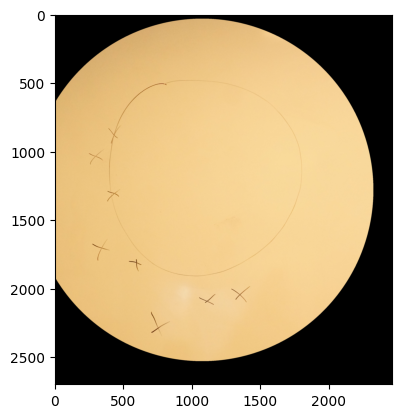

In [26]:
# defining center coordinates
y = 1283
x = 1074
r = 1250

# setting up mask
mask = np.ones(shape=test_image.shape[0:2], dtype="bool")

rr, cc = ski.draw.disk( center=(y, x) , radius=r , shape=test_image.shape[0:2] )
mask[rr, cc] = False

# testing mask
test_image[mask] = 0
show_image(test_image, cmap=None)

In [28]:
# setting up a loop to save the circularly masked images
dir = '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data'
file_spec = '.tif'

# setting up a loop to crop all images
data_circular = []

for i in range( 0 , len(data) ):
    im = data[i]
    im[mask] = 0
    data_circular.append(im)
    iio.imwrite( uri = os.path.join( dir , "circular_image_" + str(i + 1) + file_spec )  , image = im )

In [29]:
# setting up a loop to save the circularly masked images as jpegs for figure illustrative purposes
dir = '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data'
file_spec = '.jpeg'

# setting up a loop to crop all images
for i in range( 0 , len(data) ):
    im = data[i]
    im[mask] = 0
    im = ski.util.img_as_ubyte(im)
    iio.imwrite( uri = os.path.join( dir , "circular_image_fig_" + str(i + 1) + file_spec )  , image = im )

### 3.1 Extra masking (will be applied later)

In [ ]:
# loading circularly masked images
dir = "/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data"
file_spec = 'circular_image_*.tif'
load_pattern = os.path.join( dir , file_spec )

data = ski.io.imread_collection(load_pattern)
print(data)

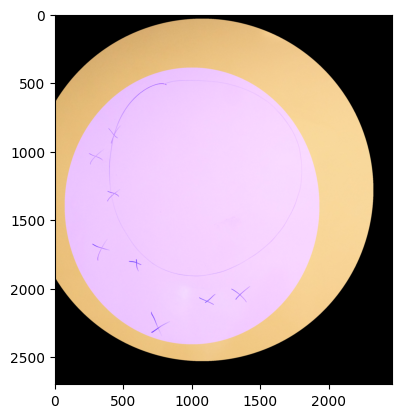

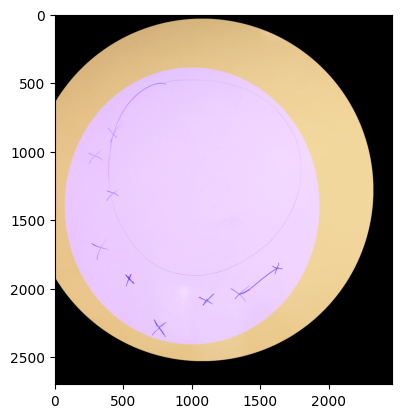

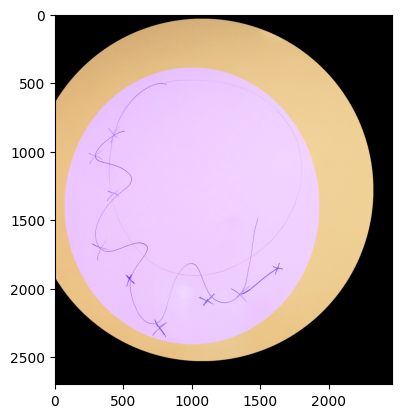

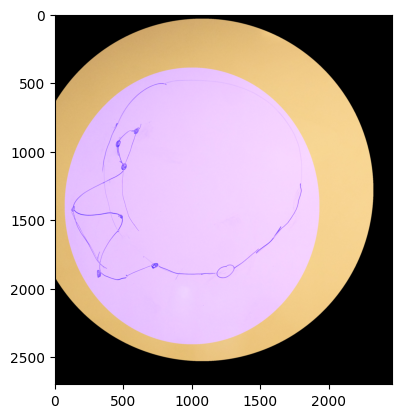

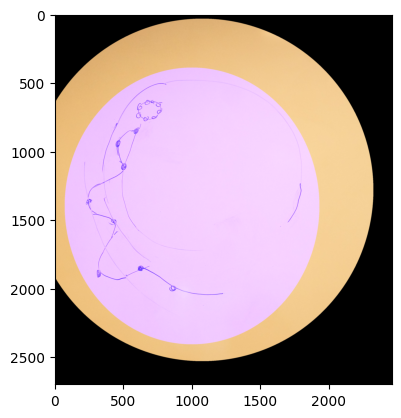

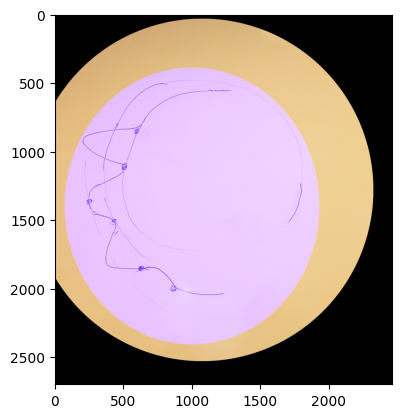

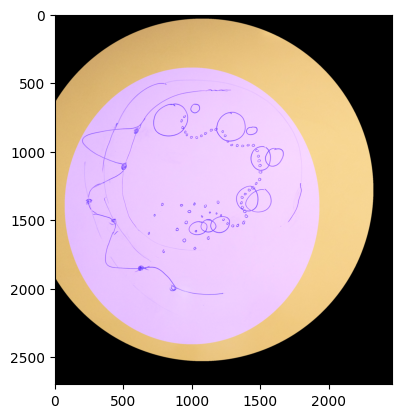

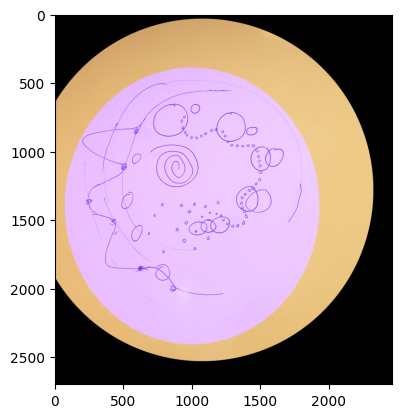

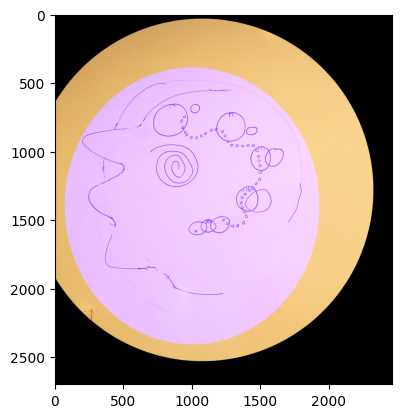

In [622]:
# showing the ellipse mask to be applied after tresholding
for i in data:
    i[rr, cc, 2] = 1
    rr, cc = ski.draw.ellipse(1400, 1000, 1010, 930, i.shape)
    show_image(i, cmap=None)

## 4. Tresholding and additional ellipse masking

In [623]:
# loading circularly masked images
dir = "/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data"
file_spec = 'circular_image_*.tif'
load_pattern = os.path.join( dir , file_spec )

data = ski.io.imread_collection(load_pattern)
print(data)

# # plotting all images
# for i in data:
#     show_image(i, cmap="gray")

['/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/circular_image_1.tif', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/circular_image_2.tif', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/circular_image_3.tif', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/circular_image_4.tif', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/circular_image_5.tif', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/circular_image_6.tif', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/circular_image_7.tif', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/circular_image_8.tif', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/circular_image_9.tif']


### 4.1 Tresholding

Tresholding the image to extract the graphical elements only. Prior to tresholding, I will convert the images to greyscale.

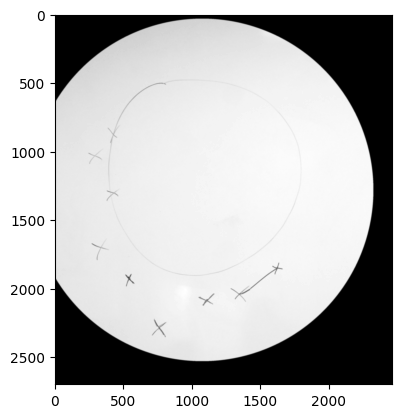

In [449]:
# loading test image and converting to grey-scale
test_im_2 = data[1]
grey_im = ski.color.rgb2gray(test_im_2)

# blurring
blured_im = ski.filters.gaussian(grey_im, sigma=2.0)

show_image(blured_im, cmap="gray")

(0.0, 1.0)

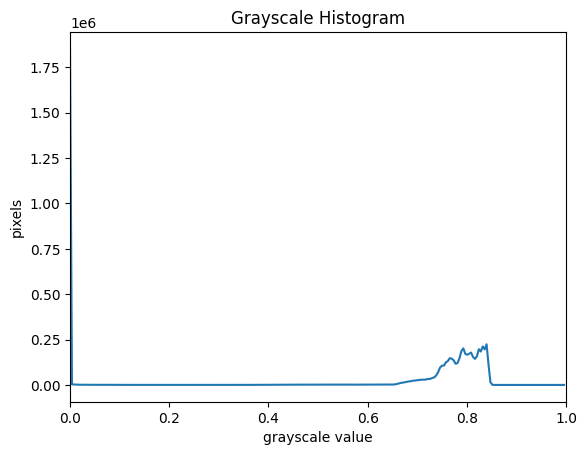

In [444]:
# making a histogram to detect a tresholding value
histogram, bin_edges = np.histogram(blured_im, bins=256, range=(0.0, 1.0))

fig, ax = plt.subplots()
ax.plot(bin_edges[0:-1], histogram)
ax.set_title("Grayscale Histogram")
ax.set_xlabel("grayscale value")
ax.set_ylabel("pixels")
ax.set_xlim(0, 1.0)

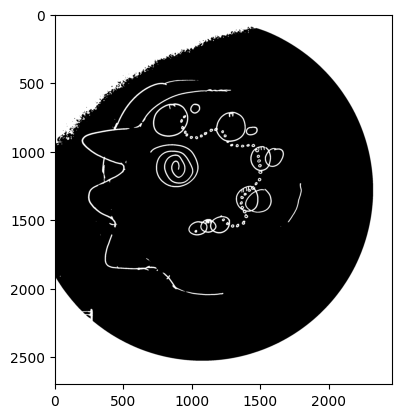

In [445]:
# create a mask based on the threshold
t = 0.73
binary_mask = blured_im < t

fig, ax = plt.subplots()
ax.imshow(binary_mask, cmap="gray")

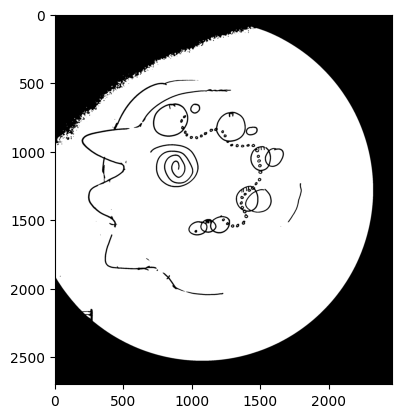

In [447]:
image_tresholded = np.invert(binary_mask)

show_image(image_tresholded, cmap="gray")

iio.imwrite( uri = dir + '/image_tresholded_test_11.png' , image = image_tresholded )


### 4.2 Setting up loop to treshold images

In [626]:
# loading circularly masked images
dir = "/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data"
file_spec = 'circular_image_*.tif'
load_pattern = os.path.join( dir , file_spec )

data = ski.io.imread_collection(load_pattern)
print(data)

['/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/circular_image_1.tif', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/circular_image_2.tif', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/circular_image_3.tif', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/circular_image_4.tif', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/circular_image_5.tif', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/circular_image_6.tif', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/circular_image_7.tif', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/circular_image_8.tif', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/circular_image_9.tif']


In [627]:
# setting up directory
dir = '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data'
file_spec = '.jpg'

# setting parameters
sigma = 2.0 # gaussian blur sigma
t = 0.73 # treshold

# looping through operations
data_tresholded = []

for i in range( 0 , len(data) ):
    im = data[i]
    im = ski.color.rgb2gray(im)
    im = ski.filters.gaussian(im, sigma=sigma)
    im = im < t
    #binary_mask = im < t
    #im = np.invert(binary_mask)
    data_tresholded.append(im)
    iio.imwrite( uri = os.path.join( dir , "tres_image_" + str(i + 1) + file_spec )  , image = im )

### 4.3 Additional masking

In [628]:
# loading tresholded images
dir = "/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data"
file_spec = 'tres_image_*.jpg'
load_pattern = os.path.join( dir , file_spec )

data = ski.io.imread_collection(load_pattern)
print(data)

['/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/tres_image_1.jpg', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/tres_image_2.jpg', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/tres_image_3.jpg', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/tres_image_4.jpg', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/tres_image_5.jpg', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/tres_image_6.jpg', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/tres_image_7.jpg', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/tres_image_8.jpg', '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data/tres_image_9.jpg']


In [629]:
# setting up directory
dir = '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data'
file_spec = '.jpg'

# defining ellipse shaped mask
mask = np.ones(shape=test_image.shape[0:2], dtype="bool")
rr, cc = ski.draw.ellipse(1400, 1000, 1010, 930, test_image.shape, rotation=0)
mask[rr, cc] = False

# looping through operations
data_tres_masked = []

for i in range( 0 , len(data) ):
    im = data[i]
    im[mask] = 0
    data_tres_masked.append(im)
    iio.imwrite( uri = os.path.join( dir , "tres_masked_image_" + str(i + 1) + file_spec )  , image = im )


In [630]:
# importing similar images but inverted (for plotting purposes)

# setting up directory
dir = '/Users/christianstenbro/Programming/notation_chain_analysis/chain_1_data'
file_spec = '.jpg'

# defining ellipse shaped mask
mask = np.ones(shape=test_image.shape[0:2], dtype="bool")
rr, cc = ski.draw.ellipse(1400, 1000, 1010, 930, test_image.shape, rotation=0)
mask[rr, cc] = False

# looping through operations
data_tres_masked = []

for i in range( 0 , len(data) ):
    im = data[i]
    im[mask] = 0
    im = np.invert(im)
    data_tres_masked.append(im)
    iio.imwrite( uri = os.path.join( dir , "tres_masked_invert_image_" + str(i + 1) + file_spec )  , image = im )